In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


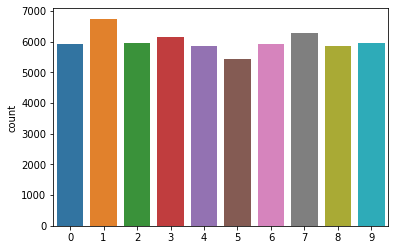

In [5]:
sns.countplot(y_train)

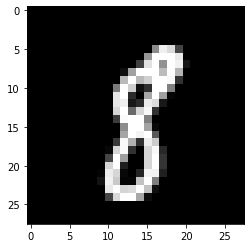

In [6]:
plt.imshow(x_train[300], cmap='gray')
plt.show()

In [7]:
input_shape = (28,28,1)

In [8]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
#CNN accepts only 4-D vector
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1) #adds 1 to the right side(1- middle ,0- left side)
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)


X Training shape:  (60000, 28, 28, 1)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28, 1)
Y Testing shape:  (10000,)


In [9]:

batch_size = 128 #no of data you want to send per epoch
num_classes = 10 #no of outputs possible
epochs = 5 #no. of time we will train and test.

In [10]:
#convert our target values/vectors into binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5), #educe overfitting
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        #It is used to represent the certainty “probability” in the network output.
        layers.Dense(num_classes, activation="softmax"), #class prediction, normalize neural networks output to fit between zero and one. 
    
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 18s 10ms/step - loss: 0.4681 - accuracy: 0.8534 - val_loss: 0.1111 - val_accuracy: 0.9690
Epoch 2/5
422/422 [==============================] - 4s 10ms/step - loss: 0.1614 - accuracy: 0.9514 - val_loss: 0.0805 - val_accuracy: 0.9770
Epoch 3/5
422/422 [==============================] - 4s 9ms/step - loss: 0.1229 - accuracy: 0.9634 - val_loss: 0.0548 - val_accuracy: 0.9863
Epoch 4/5
422/422 [==============================] - 4s 9ms/step - loss: 0.1024 - accuracy: 0.9682 - val_loss: 0.0560 - val_accuracy: 0.9847
Epoch 5/5
422/422 [==============================] - 4s 9ms/step - loss: 0.0925 - accuracy: 0.9715 - val_loss: 0.0470 - val_accuracy: 0.9878


In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history)

Test loss: 0.046733368188142776
Test accuracy: 0.9836000204086304
{'loss': [0.4681054949760437, 0.16144122183322906, 0.12286597490310669, 0.10235550254583359, 0.09250553697347641], 'accuracy': [0.8533518314361572, 0.951370358467102, 0.9633888602256775, 0.9681851863861084, 0.9715185165405273], 'val_loss': [0.1111108586192131, 0.08045578747987747, 0.054835252463817596, 0.0560041181743145, 0.04701663553714752], 'val_accuracy': [0.968999981880188, 0.9769999980926514, 0.9863333106040955, 0.984666645526886, 0.9878333210945129]}


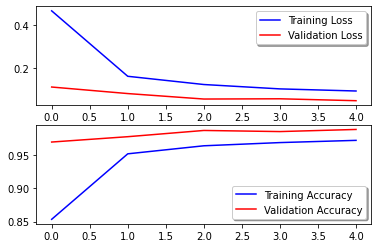

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0467 - accuracy: 0.9836


In [17]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

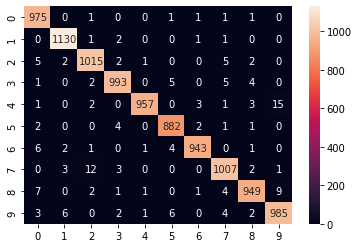

In [18]:
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [19]:
import cv2 as cv
from google.colab.patches import cv2_imshow

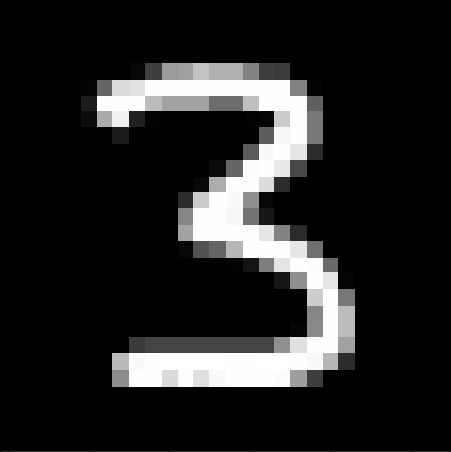

In [20]:
img = cv.imread('three.png')
cv2_imshow(img)

In [21]:
img.shape

(452, 451, 3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [23]:
gray.shape

(452, 451)

In [24]:
img_rs = cv.resize(gray, (28, 28))

In [25]:
img_rs.shape

(28, 28)

In [26]:
cv2_imshow(img_rs)

In [27]:
img_rs = np.expand_dims(img_rs,0)

In [28]:
img_rs.shape

(1, 28, 28)

In [29]:
img_rs = np.expand_dims(img_rs,-1)

In [30]:
img_rs.shape

(1, 28, 28, 1)

In [31]:
num = model.predict(img_rs)
num

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
rs = [0,1,2,3,4,5,6,7,8,9]

In [33]:
from numpy.core.fromnumeric import argmax
result = rs[argmax(num)]

In [34]:
result

3

In [35]:
model.save('mnist.h5')

In [36]:
model = load_model('mnist.h5')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0